In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import LogFormatter, LogLocator

from mfnet.layer import Linear, ReLU
from mfnet.nn import NeuralNetwork
from mfnet.tensor import tensor
from mfnet.train import train_test_classification
from mfnet.trainutils import train_test_split

In [2]:
plt.style.use(
    [
        f"../mplstyles/{style}.mplstyle"
        for style in ["grid", "science", "notebook", "mylegend"]
    ],
)

In [3]:
def binary_encode(x: int) -> list[int]:
    """10 digit binary encoding of x."""
    return list(reversed([x >> i & 1 for i in range(10)]))


def parity_encode(x: int) -> list[int]:
    """Parity encoding of x."""
    if x % 2 == 0:
        return [1, 0]
    return [0, 1]


In [4]:
inputs = tensor([binary_encode(i) for i in range(10_000)])
targets = tensor([parity_encode(i) for i in range(10_000)])

x_train, y_train, x_test, y_test = train_test_split(
    inputs,
    targets,
    test_size=0.2,
    seed=42,
)

In [5]:
NUM_EPOCHS = 100
LEARNING_RATE = 0.001
TEST_INTERVAL = 4
SAVEFIG = False

In [6]:
linear_model = NeuralNetwork([Linear(10, 2)])


linear_train_losses, linear_test_epochs, linear_test_losses, linear_test_accuracies = (
    train_test_classification(
        net=linear_model,
        train_inputs=x_train,
        train_targets=y_train,
        test_inputs=x_test,
        test_targets=y_test,
        test_interval=TEST_INTERVAL,
        num_epochs=NUM_EPOCHS,
        lr=LEARNING_RATE,
    )
)

In [7]:
nn_model = NeuralNetwork(
    [
        Linear(10, 128),
        ReLU(),
        Linear(128, 10),
        ReLU(),
        Linear(10, 2),
    ],
)


train_losses, test_epochs, test_losses, test_accuracies = train_test_classification(
    net=nn_model,
    train_inputs=x_train,
    train_targets=y_train,
    test_inputs=x_test,
    test_targets=y_test,
    test_interval=TEST_INTERVAL,
    num_epochs=NUM_EPOCHS,
    lr=LEARNING_RATE,
)

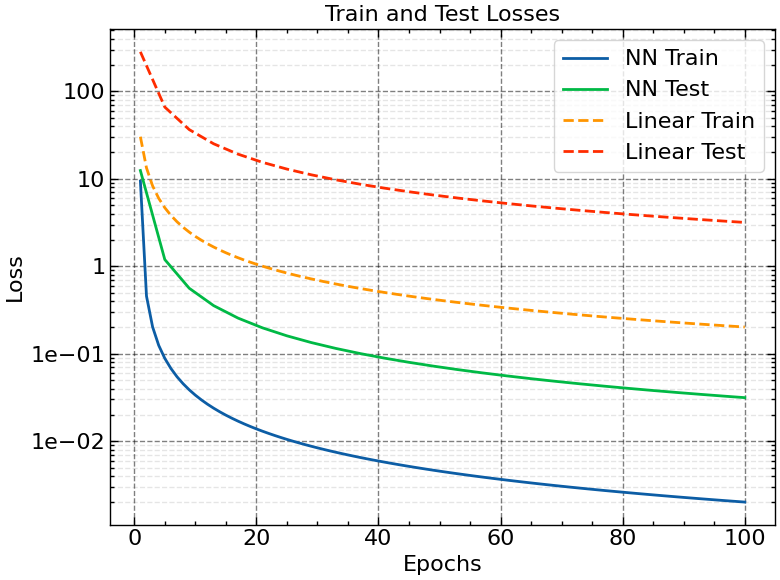

In [8]:
fig, ax = plt.subplots(1, 1)

ax.plot(range(1, NUM_EPOCHS + 1), train_losses, label="NN Train")
ax.plot(
    [*list(range(1, NUM_EPOCHS + 1, TEST_INTERVAL)), NUM_EPOCHS],
    test_losses,
    label="NN Test",
)
ax.plot(
    range(1, NUM_EPOCHS + 1),
    linear_train_losses,
    label="Linear Train",
    linestyle="--",
)
ax.plot(
    [*list(range(1, NUM_EPOCHS + 1, TEST_INTERVAL)), NUM_EPOCHS],
    linear_test_losses,
    label="Linear Test",
    linestyle="--",
)


ax.set_title("Train and Test Losses")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")

ax.legend()
ax.grid(axis="y", which="minor", alpha=0.1)

ax.set_yscale("log")


class PlainLogFormatter(LogFormatter):
    def __call__(self, x: float, pos: int | None = None, tol: float = 1e-8) -> str:
        label = super().__call__(x, pos)
        if label == "":
            return ""
        try:
            value = float(x)
            if abs(value - int(value)) < tol:
                return str(int(value))
            else:  # noqa: RET505
                return f"{x:.4g}"
        except Exception:  # noqa: BLE001
            return label


# y-axis ticks
ax.yaxis.set_major_locator(LogLocator(base=10, numticks=10))
ax.yaxis.set_major_formatter(LogFormatter())

ax.yaxis.set_minor_locator(LogLocator(base=10, subs="auto", numticks=10))
ax.yaxis.set_minor_formatter(PlainLogFormatter(minor_thresholds=(3, 1)))

fig.tight_layout()
plt.show()

if SAVEFIG:
    fig.savefig("./images/class_loss.png", dpi=200)


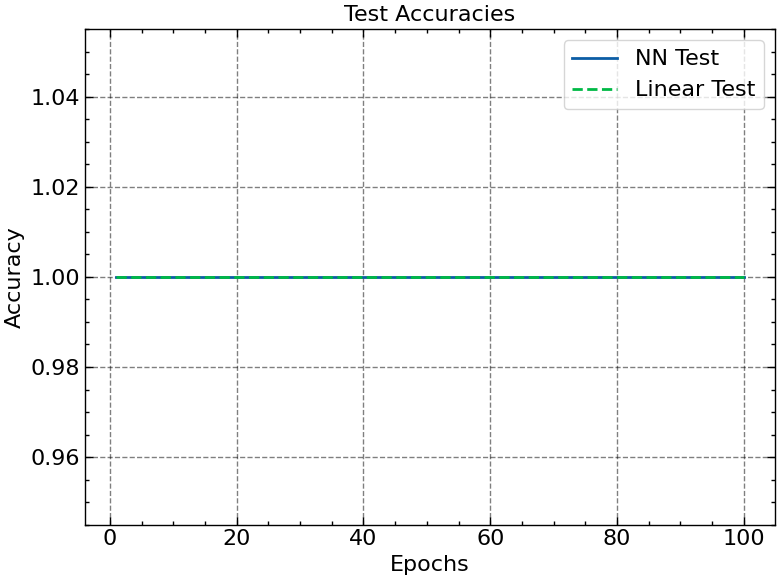

In [9]:
fig, ax = plt.subplots(1, 1)

ax.plot(
    [*list(range(1, NUM_EPOCHS + 1, TEST_INTERVAL)), NUM_EPOCHS],
    test_accuracies,
    label="NN Test",
)
ax.plot(
    [*list(range(1, NUM_EPOCHS + 1, TEST_INTERVAL)), NUM_EPOCHS],
    linear_test_accuracies,
    label="Linear Test",
    linestyle="--",
)

ax.legend()

ax.set_title("Test Accuracies")
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")

fig.tight_layout()
plt.show()

if SAVEFIG:
    fig.savefig("./images/class_accuracy.png", dpi=200)
